In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.merge import merge
%matplotlib inline

In [13]:
clpx12 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_1_2.tif')
clpx13 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_1_3.tif')
clpx21 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_1_4.tif')
clpx22 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_2_2.tif')
clpx23 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_2_3.tif')
clpx24 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_2_4.tif')
clpx25 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_2_5.tif')
clpx32 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_3_2.tif')
clpx33 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_3_3.tif')
clpx34 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_3_4.tif')
clpx41 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_4_1.tif')
clpx42 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_4_2.tif')
clpx43 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_4_3.tif')
clpx44 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_4_4.tif')
clpx51 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_5_1.tif')
clpx52 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_5_2.tif')
clpx53 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_5_3.tif')
clpx60 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_6_0.tif')
clpx61 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_6_1.tif')
clpx62 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_6_2.tif')
clpx63 = rasterio.open('/home/cparr/surfaces/level_0_surfaces/clpx/clpx_2016_096_snow_on_6_3.tif')

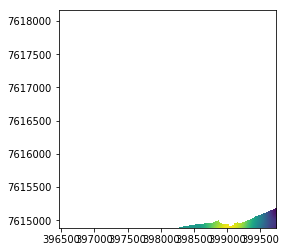

In [4]:
show(clpx12)

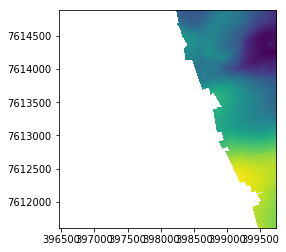

In [5]:
show(clpx13)

In [21]:
srcs = [clpx12,clpx13,clpx21,clpx22,
        clpx23,clpx24,clpx25,clpx32,
        clpx33,clpx34,clpx41,clpx42,
        clpx43,clpx44,clpx51,clpx52,
        clpx53,clpx60,clpx61,clpx62,clpx63]

In [22]:
arr, out_trans = merge(srcs, res=1)

In [23]:
out_trans

Affine(1.0, 0.0, 396460.8,
       0.0, -1.0, 7624716.0)

In [24]:
arr.shape

(1, 19661, 19661)

In [25]:
out_meta = clpx22.meta.copy()
out_meta

{'count': 1,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 16384,
 'nodata': -32767.0,
 'transform': Affine(0.1999999999999993, 0.0, 399737.6,
       0.0, -0.19999999999998863, 7618162.4),
 'width': 16384}

In [26]:
arr[0].shape

(19661, 19661)

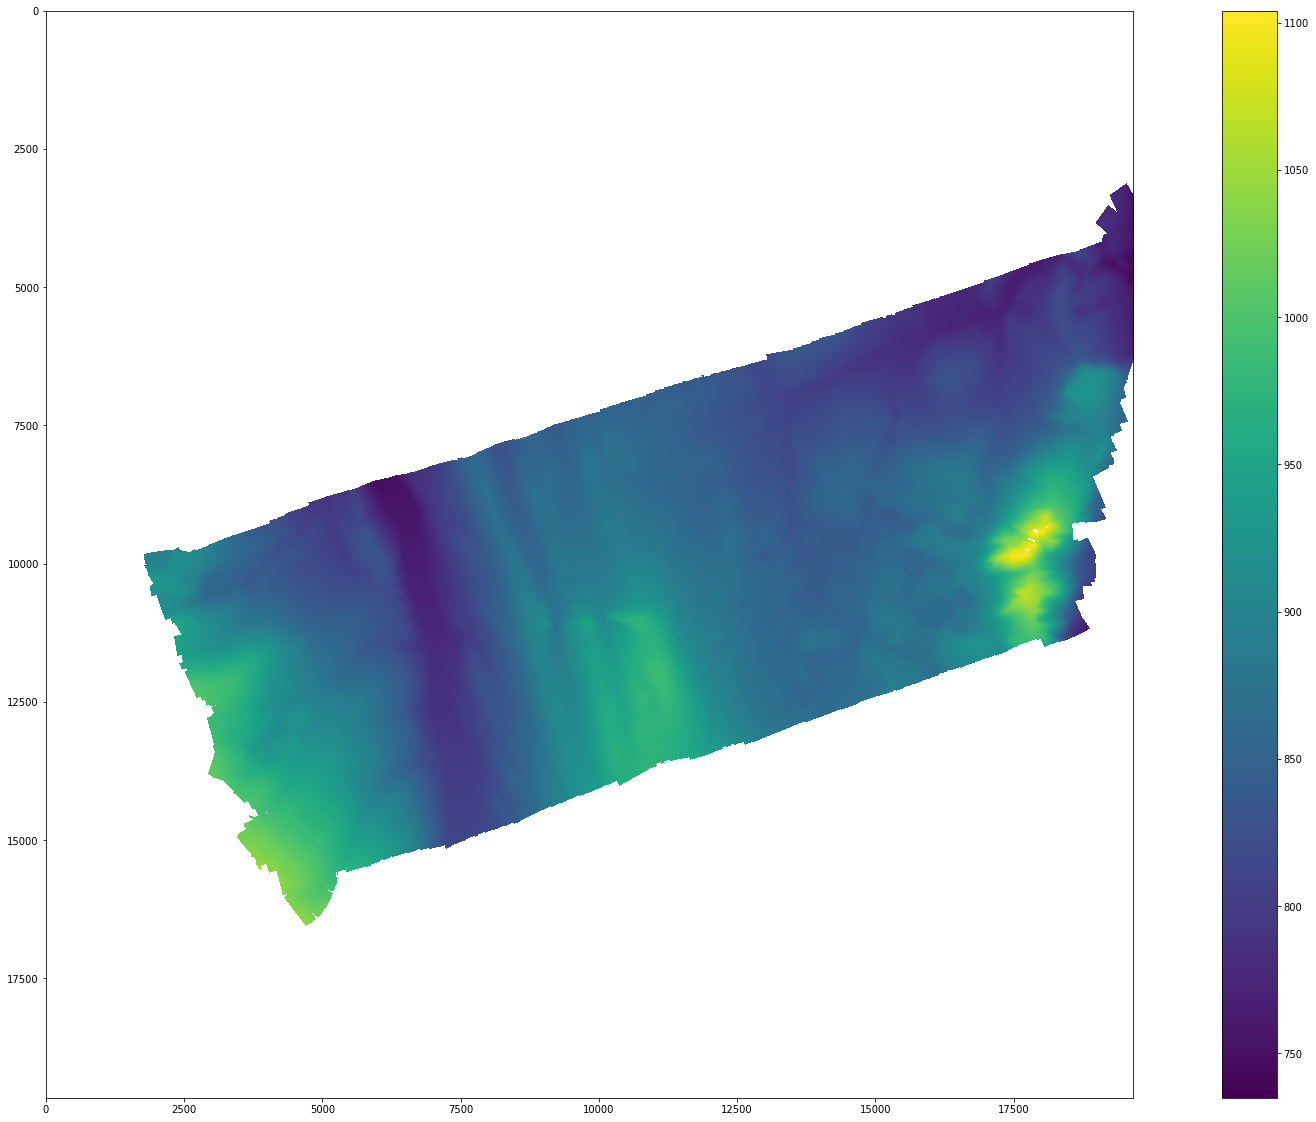

In [27]:
arr = arr[0]
arr[arr == -32767.0] = np.nan
plt.figure(figsize=(32,20))
plt.imshow(arr)
plt.colorbar()

In [28]:
out_meta.update({"height": arr.shape[0],
                 "width": arr.shape[1],
                 "transform": out_trans})
out_meta

{'count': 1,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 19661,
 'nodata': -32767.0,
 'transform': Affine(1.0, 0.0, 396460.8,
       0.0, -1.0, 7624716.0),
 'width': 19661}

In [29]:
np.nanmax(arr)

1104.095

In [30]:
np.nanmin(arr)

734.90973

In [32]:
out_meta.update({"nodata": np.nan})
out_meta

{'count': 1,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 19661,
 'nodata': nan,
 'transform': Affine(1.0, 0.0, 396460.8,
       0.0, -1.0, 7624716.0),
 'width': 19661}

In [33]:
with rasterio.open("/home/cparr/surfaces/level_1_surfaces/clpx/clpx_096_2016.tif", "w", **out_meta) as dest:
    dest.write(arr,1)